In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dominoweir/skincare-product-ingredients")

print("Path to dataset files:", path)

100%|██████████| 264k/264k [00:00<00:00, 39.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dominoweir/skincare-product-ingredients/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming the dataset is in CSV format, load it into a pandas DataFrame
dataset_file = path + "/cosmetic_p.csv"  # Replace "filename.csv" with the actual file name
df = pd.read_csv(dataset_file)

# Display the DataFrame
df.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
df.shape

(1472, 11)

In [ ]:
df['ingredients']

,ingredients
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,"Water, Snail Secretion Filtrate, Phenyl Trimet..."
...,...
1467,"Water, Alcohol Denat., Potassium Cetyl Phospha..."
1468,"Water, Isododecane, Dimethicone, Butyloctyl Sa..."
1469,"Water, Dihydroxyacetone, Glycerin, Sclerocarya..."
1470,"Water, Dihydroxyacetone, Propylene Glycol, PPG..."


In [ ]:
!pip install google-generativeai

In [ ]:
import google.generativeai as genai
from google.colab import userdata

# Preuzmi API ključ (sigurniji način nego ručno upisivanje)
GOOGLE_API_KEY = userdata.get("GOOGLE_API_KEY")

# Konfiguracija Gemini API-ja
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
def clean_ingredients_gemini_safe(ingredients):
    model = genai.GenerativeModel("gemini-1.5-flash-001")

    prompt = f"""
    Tvoja uloga je da očistiš listu sastojaka kozmetičkog proizvoda.
    Sastojci: {ingredients}
    Vrati samo očišćene sastojke, bez dodatnih objašnjenja.
    Normaliziraj različite nazive istih sastojaka (npr. 'Aqua' → 'Water').
    Zadrži ime sastojka koje se pojavljuje u mojem popisu radi kasnije usporedbe.
    Ovo su inače sastojci u kozmetičkim proizvodima, tako da ako se pojavljuje tipa Alcohol, nemoj da ti bude čudno.
    Podaci su prikupljeni sa Sephorine stranice.
    Također ukloni nepoznate ili suvišne sastojke.
    Očisti format (nema čudnih simbola ili loših karaktera).
    Prouči nazive za jedan te isti sastojak.(npr. Aqua-> Water).Zadrži samo jedan naziv.
    Također npr. ako za neku boju ima više oznaka, zadrži samo jednu oznaku.
    Odgovor mi molim te vrati u obliku liste stringova npr. ['Aqua','Mineral Oil']
    """

    try:
        response = model.generate_content(prompt)

        if not response.parts:
            return "[⚠️ Nema odgovora – blokirano zbog sigurnosnih razloga]"

        return response.text.strip()

    except Exception as e:
        return f"[⚠️ Greška: {e}]"


In [ ]:
# Izdvojite sastojke iz stupca 'ingredients'
ingredients_list = df['ingredients'].str.split(', ').tolist()

# Stvorite listu svih jedinstvenih sastojaka
all_ingredients = set([item for sublist in ingredients_list for item in sublist])

In [ ]:
len(all_ingredients)

7138

In [ ]:
clean_all_ingredinets = clean_ingredients_gemini_safe(ingredients=all_ingredients)

In [ ]:
clean_all_ingredinets

"```python\ningredients = [\n    'Sorbitan Sesquiisostearate',\n    'Albiza Julibrissin Bark Extract',\n    'Propylene Carbonate',\n    'Rhus Succedanea Fruit Wax',\n    'Cladosiphon Okamuranus Extract',\n    'Cetyl Esters',\n    'Garcinia Mangostana Peel Extract',\n    'Polyglyceryl-5 Laurate',\n    'Boron nitride',\n    'Thermus Thermophillus Ferment',\n    'Ledebouriella Seseloides Root Extract',\n    'Citrus Aurantium Amara (Bitter Orange) Flower Oil',\n    'Red Clover Extract',\n    'Hydrolyzed Soy Protein',\n    'Cinnamomum Camphora (Camphor) Leaf Extract',\n    'Tsuga Canadensis Oil',\n    'Gellidiella Acerosa Extract',\n    'Lithospermum Erythrorhizon Root Extract',\n    'Dioscorea Villosa (Wild Yam) Root Extract',\n    'Oleth-3 Phosphate',\n    'Plantago Lanceolata Leaf Extract',\n    'Acetylarginyltryptophyl Diphenylglycine',\n    'Saponaria Officinalis Leaf Extract',\n    'Palmitic Acid',\n    'Disodium Lauriminodipropionate Tocopheryl Phosphates',\n    'sh-Polypeptide-8',\n

In [ ]:
import re

# Regularni izraz koji vadi sve stringove unutar jednostrukih ili dvostrukih navodnika
ingredients = re.findall(r'["\']([^"\']+)["\']', clean_all_ingredinets)

# Prikaži očišćenu listu
print(ingredients)

['Sorbitan Sesquiisostearate', 'Albiza Julibrissin Bark Extract', 'Propylene Carbonate', 'Rhus Succedanea Fruit Wax', 'Cladosiphon Okamuranus Extract', 'Cetyl Esters', 'Garcinia Mangostana Peel Extract', 'Polyglyceryl-5 Laurate', 'Boron nitride', 'Thermus Thermophillus Ferment', 'Ledebouriella Seseloides Root Extract', 'Citrus Aurantium Amara (Bitter Orange) Flower Oil', 'Red Clover Extract', 'Hydrolyzed Soy Protein', 'Cinnamomum Camphora (Camphor) Leaf Extract', 'Tsuga Canadensis Oil', 'Gellidiella Acerosa Extract', 'Lithospermum Erythrorhizon Root Extract', 'Dioscorea Villosa (Wild Yam) Root Extract', 'Oleth-3 Phosphate', 'Plantago Lanceolata Leaf Extract', 'Acetylarginyltryptophyl Diphenylglycine', 'Saponaria Officinalis Leaf Extract', 'Palmitic Acid', 'Disodium Lauriminodipropionate Tocopheryl Phosphates', 'sh-Polypeptide-8', 'Citrus Aurantifolia (Lime) Fruit Extract', 'Citrus Aurantifolia (Lime) Oil', 'Butyrospermum Parkii Nut Shell Powder', 'Carya Ovata Bark Extract', 'Ceteareth-

In [ ]:
len(ingredients)

769

In [ ]:
ingredients

['Sorbitan Sesquiisostearate',
 'Albiza Julibrissin Bark Extract',
 'Propylene Carbonate',
 'Rhus Succedanea Fruit Wax',
 'Cladosiphon Okamuranus Extract',
 'Cetyl Esters',
 'Garcinia Mangostana Peel Extract',
 'Polyglyceryl-5 Laurate',
 'Boron nitride',
 'Thermus Thermophillus Ferment',
 'Ledebouriella Seseloides Root Extract',
 'Citrus Aurantium Amara (Bitter Orange) Flower Oil',
 'Red Clover Extract',
 'Hydrolyzed Soy Protein',
 'Cinnamomum Camphora (Camphor) Leaf Extract',
 'Tsuga Canadensis Oil',
 'Gellidiella Acerosa Extract',
 'Lithospermum Erythrorhizon Root Extract',
 'Dioscorea Villosa (Wild Yam) Root Extract',
 'Oleth-3 Phosphate',
 'Plantago Lanceolata Leaf Extract',
 'Acetylarginyltryptophyl Diphenylglycine',
 'Saponaria Officinalis Leaf Extract',
 'Palmitic Acid',
 'Disodium Lauriminodipropionate Tocopheryl Phosphates',
 'sh-Polypeptide-8',
 'Citrus Aurantifolia (Lime) Fruit Extract',
 'Citrus Aurantifolia (Lime) Oil',
 'Butyrospermum Parkii Nut Shell Powder',
 'Carya Ova

In [ ]:
# prompt: pretovri listu ingredients u set

ingredients_set = set(ingredients)
print(ingredients_set)
len(ingredients_set)
ingredients_set



{'Quaternium-18 Bentonite', 'Cimicifuga Racemosa Root Extract', 'Capric/ Caprylic Triglyceride', 'Ext. Violet 2', 'Cananga Odorata (Ylang Ylang) Oil', 'Albiza Julibrissin Bark Extract', 'Propylene Carbonate', 'Ascorbyl Tetraisopalmitate', 'Rhus Succedanea Fruit Wax', 'Coix Lacryma-Jobi Ma-Yuen Seed Extract', 'Cladosiphon Okamuranus Extract', 'Linum Usitatissimum (ORGANIC Linseed) Seed Oil', 'Citrus Paradisi (Grapefruit) Seed Extract', 'Polyglyceryl-5 Laurate', 'Boron nitride', 'Avena Sativa (Oat) Kernel Extract', 'Ledebouriella Seseloides Root Extract', 'Salvia Officinalis (Sage) Leaf', 'Ethylhexyl Salicylate', 'Citrus Aurantium Amara (Bitter Orange) Flower Oil', 'Red Clover Extract', 'Copaifera Officinalis (Balsam Copaiba) Resin', 'Cinnamomum Camphora (Camphor) Leaf Extract', 'Hydrolyzed Prunus Domestica', 'Cocos Nucifera (Coconut) Oil', 'C30 Hydrocarbons', 'Hammamelis Virginiana (Witch Hazel) Leaf Extract', 'Gellidiella Acerosa Extract', 'Caprylyl Glycol', 'Isopropylparaben', 'Lithos

{'1,2-Hexanediol',
 '3-O-Ethyl Ascorbic Acid',
 '6-Naphthalate',
 'Acacia Farnesiana Flower Wax',
 'Acacia Victoriae Fruit Extract',
 'Acetyl Hexapeptide-8',
 'Acetylarginyltryptophyl Diphenylglycine',
 'Achillea Millefolium Flower Extract',
 'Acrylates /C10-30 Alkyl Acrylate Crosspolymer',
 'Acrylates C10/30 Alkyl Acrylate Crosspolymer',
 'Acrylates/C10-30 Alykyl Acrylate Crosspolymer',
 'Acrylates/Vinyl Isodecanoate Crosspolymer',
 'Aesculus Hippocastanum (Horse Chestnut) Extract',
 'Agarum Cribosum Extract',
 'Agave Tequilana Leaf Extract',
 'Albiza Julibrissin Bark Extract',
 'Alchol Denat',
 'Alcohol',
 'Alcohol Denat',
 'Alcohol denat',
 'Aleurites Moluccana (Kukui) Nut Oil',
 'Algae Extract',
 'Algin',
 'Alkanna Tinctoria Root Extract',
 'Allantoin',
 'Aloe Barbadensis Leaf Extract',
 'Aloe Barbadensis Leaf Juice',
 'Aloe Yohjyu Matsu Ekisu',
 'Alpha Isomethyl Ionone',
 'Alpha Lipoic Acid',
 'Aluminum Hydroxide',
 'Amber Powder',
 'Ammonium Acryloyldimethyltaurate/Vp Copolymer',

In [ ]:
ingredients_set

{'1,2-Hexanediol',
 '3-O-Ethyl Ascorbic Acid',
 '6-Naphthalate',
 'Acacia Farnesiana Flower Wax',
 'Acacia Victoriae Fruit Extract',
 'Acetyl Hexapeptide-8',
 'Acetylarginyltryptophyl Diphenylglycine',
 'Achillea Millefolium Flower Extract',
 'Acrylates /C10-30 Alkyl Acrylate Crosspolymer',
 'Acrylates C10/30 Alkyl Acrylate Crosspolymer',
 'Acrylates/C10-30 Alykyl Acrylate Crosspolymer',
 'Acrylates/Vinyl Isodecanoate Crosspolymer',
 'Aesculus Hippocastanum (Horse Chestnut) Extract',
 'Agarum Cribosum Extract',
 'Agave Tequilana Leaf Extract',
 'Albiza Julibrissin Bark Extract',
 'Alchol Denat',
 'Alcohol',
 'Alcohol Denat',
 'Alcohol denat',
 'Aleurites Moluccana (Kukui) Nut Oil',
 'Algae Extract',
 'Algin',
 'Alkanna Tinctoria Root Extract',
 'Allantoin',
 'Aloe Barbadensis Leaf Extract',
 'Aloe Barbadensis Leaf Juice',
 'Aloe Yohjyu Matsu Ekisu',
 'Alpha Isomethyl Ionone',
 'Alpha Lipoic Acid',
 'Aluminum Hydroxide',
 'Amber Powder',
 'Ammonium Acryloyldimethyltaurate/Vp Copolymer',

In [ ]:
len(ingredients_set)

714

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Pretpostavimo da imate dataframe 'df' i set sastojaka 'ingredients_set'

# Kreirajte graf
graph = nx.Graph()

# Dodajte čvorove za svaki proizvod
products = df['Label'].unique()
graph.add_nodes_from(products, type='product')

# Dodajte čvorove za svaki sastojak
graph.add_nodes_from(ingredients_set, type='ingredient')

# Povežite proizvode sa sastojcima
for index, row in df.iterrows():
    product_name = row['Label']
    # Pretpostavljam da sastojci u stupcu 'ingredients' odvojeni zarezom i razmakom
    ingredients = row['ingredients'].split(', ')
    for ingredient in ingredients:
        # Provjerite nalazi li se sastojak u pročišćenom setu sastojaka
        if ingredient in ingredients_set:
            graph.add_edge(product_name, ingredient)

# Ispis broja čvorova i bridova
print(f"Broj čvorova: {graph.number_of_nodes()}")
print(f"Broj bridova: {graph.number_of_edges()}")

Broj čvorova: 720
Broj bridova: 1707


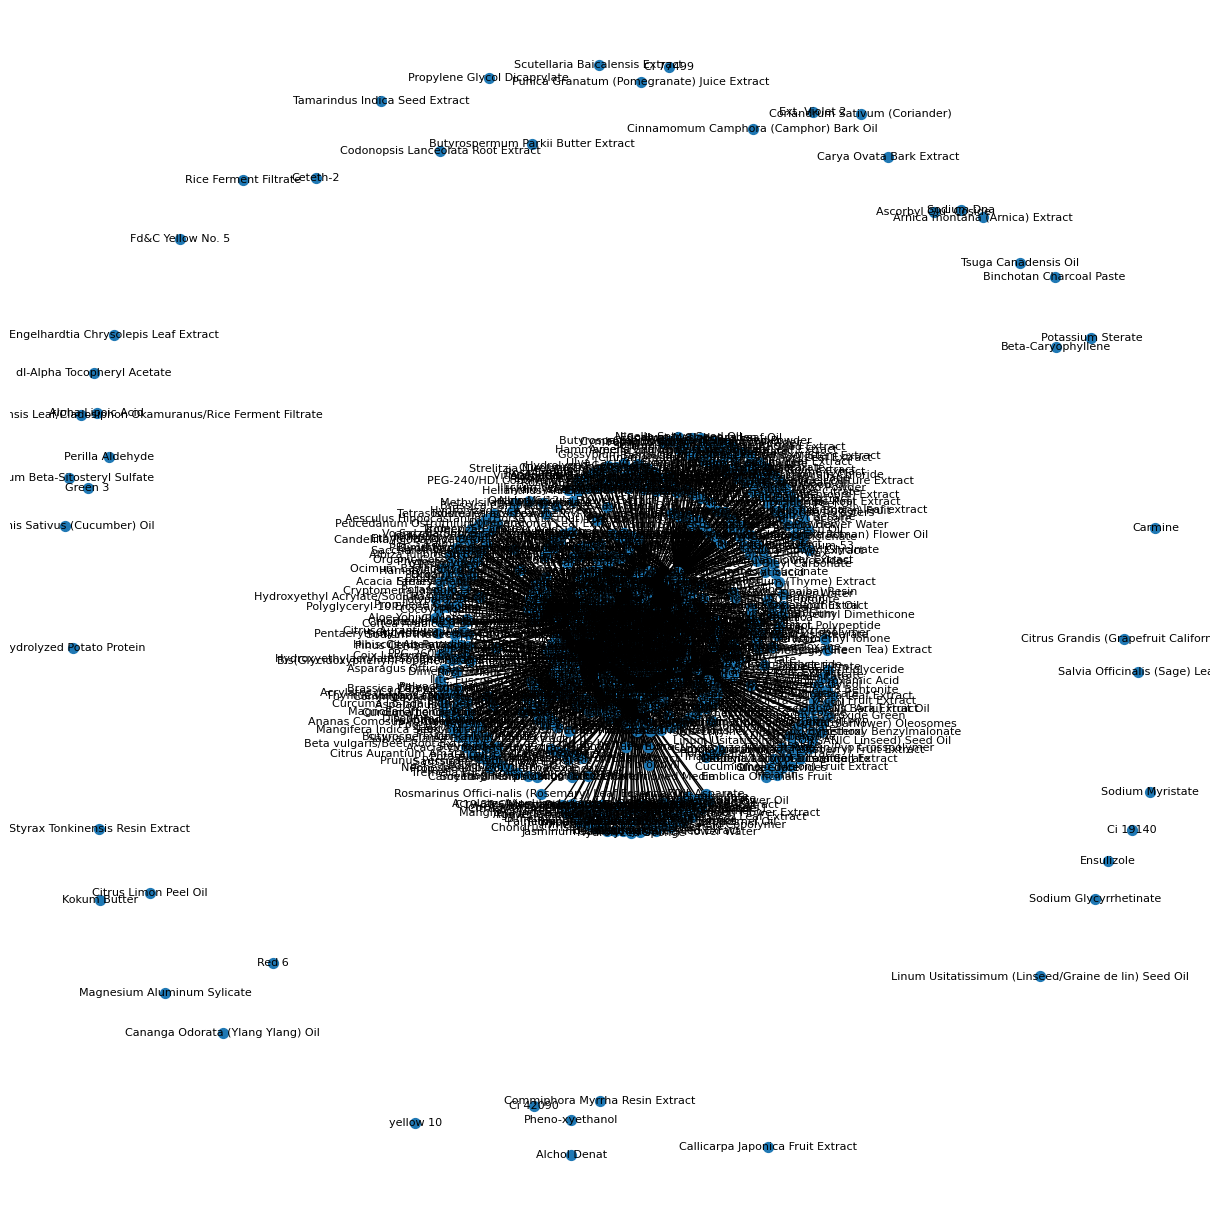

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, k=0.1)  # Manja vrijednost k komprimira graf
nx.draw(graph, pos, with_labels=True, node_size=50, font_size=8)
plt.show()

In [ ]:
!pip install plotly kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import networkx as nx # Pretpostavljamo da je networkx već uvezen i graf kreiran

# Dohvatite pozicije čvorova
# Osigurajte da je 'graph' objekt NetworkX grafa kreiran s čvorovima iz products i ingredients_set
# na temelju prethodnih koraka
pos = nx.spring_layout(graph, k=0.1)

# Kreirajte liste bridova i čvorova za plotly
edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

node_x = []
node_y = []
node_text = []
for node in graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

# Kreirajte trag za bridove
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Kreirajte trag za čvorove
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Broj veza',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Dodajte tekst (labele) čvorovima
node_trace.text = node_text

# Kreirajte figuru
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

# Prikaz figure (u Google Colabu)
fig.show()